In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
sns.set()

In [2]:
df = pd.read_csv('data/cs-training.csv', index_col=0)

# [1] Exploratory Data Aanalysis

- Categorical VS target
- Continuous VS target
- Missing values
- Distribution of values
- Sanity check
- Class balance

## Check class balance

In [3]:
df.SeriousDlqin2yrs.value_counts(normalize=True)

0    0.93316
1    0.06684
Name: SeriousDlqin2yrs, dtype: float64

Highly skewed classes, with only 6.7% positive classes.

## Check relationship between Categorical VS Target variables

### Age VS Target

Text(0.5, 1.0, 'Age by Target value')

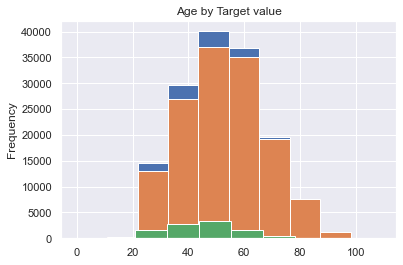

In [4]:
df.age.plot.hist()
df[df.SeriousDlqin2yrs == 0].age.plot.hist(bins=10)
df[df.SeriousDlqin2yrs == 1].age.plot.hist(bins=7)
plt.title("Age by Target value")

Those who default their loans are generally under 70.

In [5]:
df[df.age < 21]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
65696,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0


In [6]:
df.age.median()

52.0

One outlier age = 0, just remove since it is only 1 data point.

### NumberOfTime30-59DaysPastDueNotWorse VS Target

In [7]:
def plot_categorical_vs_target(category):
    plot_df = df.groupby([category, 'SeriousDlqin2yrs']).age.count().reset_index()
    plot_df.columns=[category, 'SeriousDlqin2yrs', 'count']
    plot_df = plot_df.pivot(index=category, columns='SeriousDlqin2yrs', values='count')
    return plot_df

Text(0.5, 1.0, 'NumberOfTime30-59DaysPastDueNotWorse by Target value (3 or more times)')

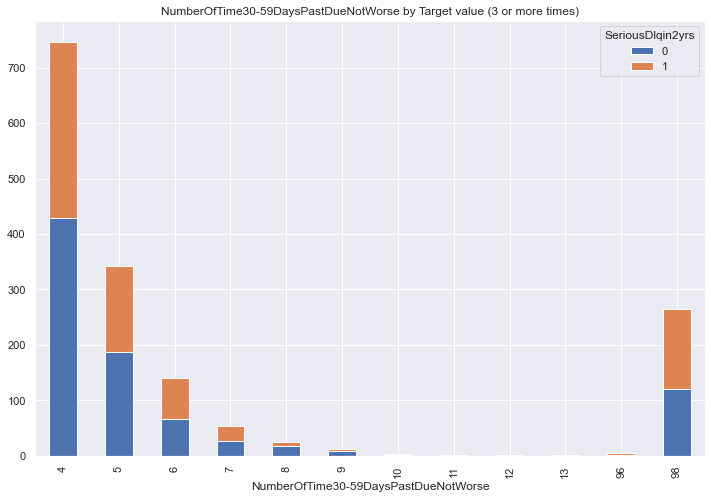

In [8]:
plot_df = plot_categorical_vs_target('NumberOfTime30-59DaysPastDueNotWorse')
plot_df[plot_df.index > 3].plot.bar(stacked=True, figsize=(12, 8))
plt.title("NumberOfTime30-59DaysPastDueNotWorse by Target value (3 or more times)")

Text(0.5, 1.0, 'NumberOfTime30-59DaysPastDueNotWorse by Target value (2 or less times)')

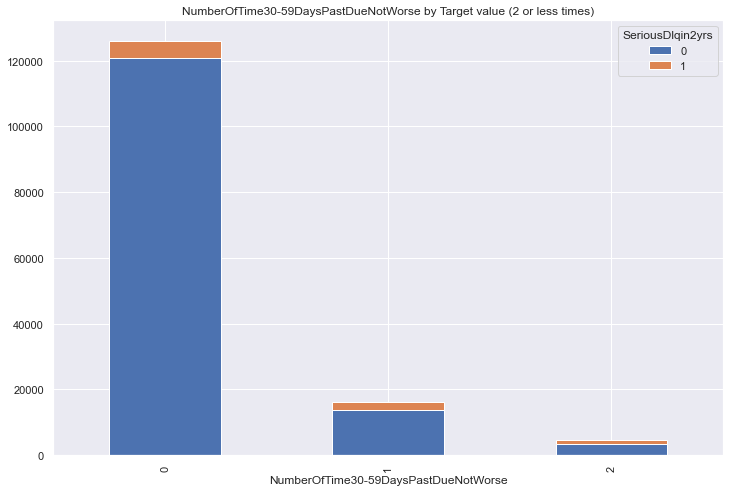

In [9]:
plot_df = plot_categorical_vs_target('NumberOfTime30-59DaysPastDueNotWorse')
plot_df[plot_df.index < 3].plot.bar(stacked=True, figsize=(12, 8))
plt.title("NumberOfTime30-59DaysPastDueNotWorse by Target value (2 or less times)")

Positive cases usually have larger than 3 NumberOfTime30-59DaysPastDueNotWorse - i.e. they paid their loans 30-59 days late at least 3 times in the last 2 years.

### NumberOfTime60-89DaysPastDueNotWorse VS Target

Text(0.5, 1.0, 'NumberOfTime60-89DaysPastDueNotWorse by Target value (2 or more times)')

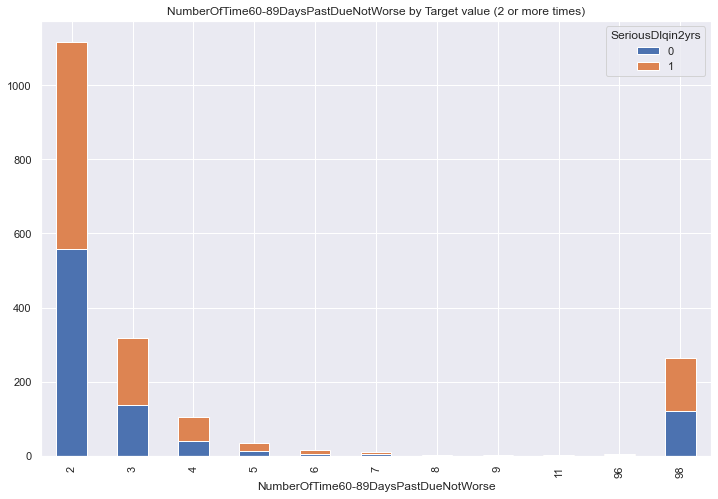

In [10]:
plot_df = plot_categorical_vs_target('NumberOfTime60-89DaysPastDueNotWorse')
plot_df[plot_df.index > 1].plot.bar(stacked=True, figsize=(12, 8))
plt.title("NumberOfTime60-89DaysPastDueNotWorse by Target value (2 or more times)")

Text(0.5, 1.0, 'NumberOfTime60-89DaysPastDueNotWorse by Target value (1 time)')

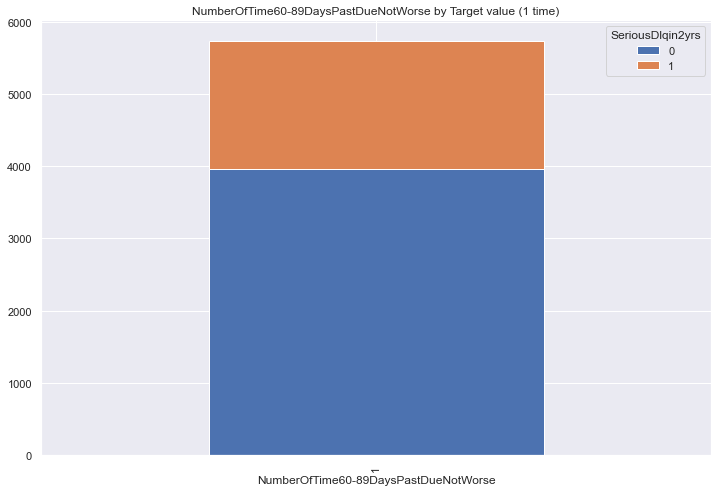

In [11]:
plot_df = plot_categorical_vs_target('NumberOfTime60-89DaysPastDueNotWorse')
plot_df[plot_df.index == 1].plot.bar(stacked=True, figsize=(12, 8))
plt.title("NumberOfTime60-89DaysPastDueNotWorse by Target value (1 time)")

Positive cases usually have larger than 2 NumberOfTime60-89DaysPastDueNotWorse - i.e. they paid their loans 60-89 days late at least 2 times in the last 2 years.

### NumberOfTimes90DaysLate VS Target

Text(0.5, 1.0, 'NumberOfTimes90DaysLate by Target value (2 or more times)')

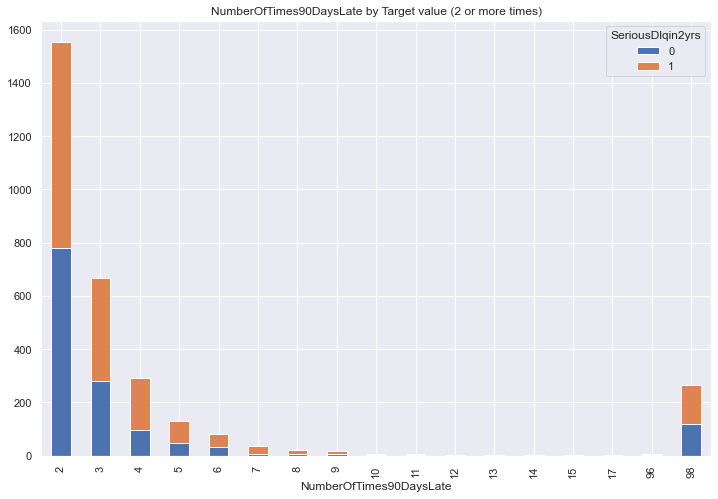

In [12]:
plot_df = plot_categorical_vs_target('NumberOfTimes90DaysLate')
plot_df[plot_df.index > 1].plot.bar(stacked=True, figsize=(12, 8))
plt.title("NumberOfTimes90DaysLate by Target value (2 or more times)")

Text(0.5, 1.0, 'NumberOfTimes90DaysLate by Target value (1 time)')

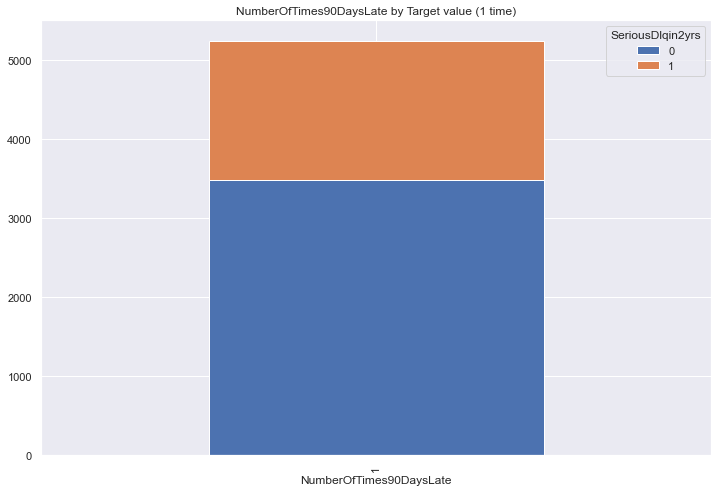

In [13]:
plot_df[plot_df.index == 1].plot.bar(stacked=True, figsize=(12, 8))
plt.title("NumberOfTimes90DaysLate by Target value (1 time)")

Positive cases are more likely to have at least 1 NumberOfTimes90DaysLate, although those with 2 or more times have even higher likelihood to default.

### NumberOfOpenCreditLinesAndLoans VS Target

Text(0.5, 1.0, 'NumberOfOpenCreditLinesAndLoans by Target value')

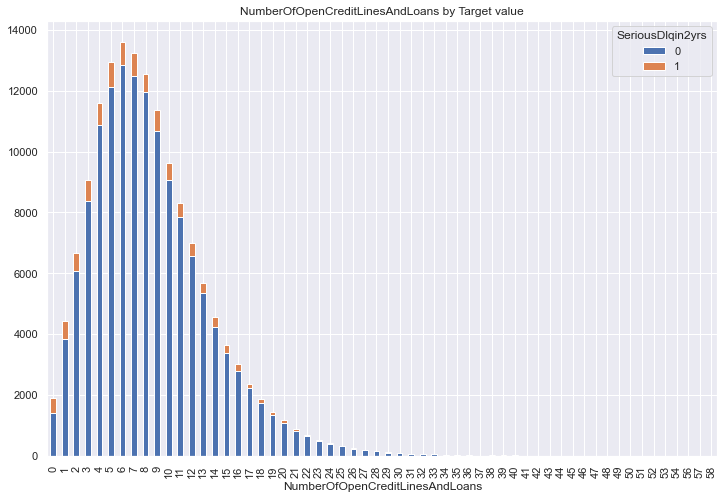

In [14]:
plot_df = plot_categorical_vs_target('NumberOfOpenCreditLinesAndLoans')
plot_df.plot.bar(stacked=True, figsize=(12, 8))
plt.title("NumberOfOpenCreditLinesAndLoans by Target value")

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='NumberOfOpenCreditLinesAndLoans'>

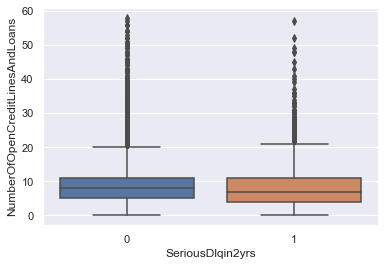

In [15]:
sns.boxplot(x="SeriousDlqin2yrs", y="NumberOfOpenCreditLinesAndLoans", data=df)

Those which are positive generally have slighly lower NumberOfOpenCreditLinesAndLoans.

### NumberRealEstateLoansOrLines VS Target

Text(0.5, 1.0, 'NumberRealEstateLoansOrLines by Target value')

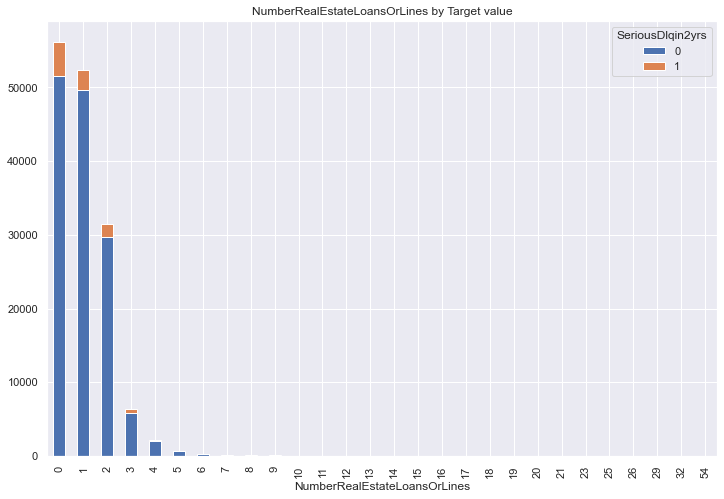

In [16]:
plot_df = plot_categorical_vs_target('NumberRealEstateLoansOrLines')
plot_df.plot.bar(stacked=True, figsize=(12, 8))
plt.title("NumberRealEstateLoansOrLines by Target value")

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='NumberRealEstateLoansOrLines'>

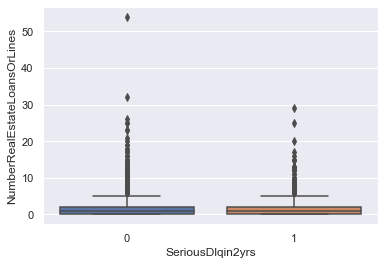

In [17]:
sns.boxplot(x="SeriousDlqin2yrs", y="NumberRealEstateLoansOrLines", data=df)


Those which are positive generally have slighly lower NumberRealEstateLoansOrLines.

### Number of Dependants VS Target

Text(0.5, 1.0, 'NumberOfDependents by Target value')

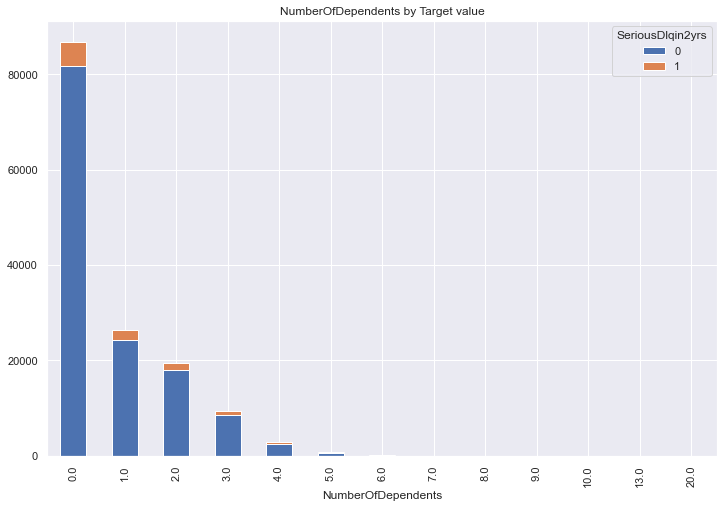

In [18]:
plot_df = plot_categorical_vs_target('NumberOfDependents')
plot_df.plot.bar(stacked=True, figsize=(12, 8))
plt.title("NumberOfDependents by Target value")

## Check relationship between Continuous VS Target variables

### DebtRatio VS Target

In [19]:
df.DebtRatio.max()

329664.0

In [20]:
df[df.DebtRatio > 1000].head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
7,0,0.305682,57,0,5710.0,NaN,8,0,3,0,0.0
17,0,0.061086,78,0,2058.0,NaN,10,0,2,0,0.0
45,0,0.368876,68,0,1687.5,1.0,31,0,1,0,0.0
51,0,0.818978,73,0,3095.0,0.0,9,0,1,1,0.0
59,0,0.541109,43,0,2477.0,NaN,3,0,1,0,2.0
63,0,0.101156,72,0,1720.0,NaN,12,0,2,0,0.0
72,0,0.142013,67,0,1824.0,NaN,7,0,2,0,0.0
74,0,0.059669,31,0,3162.0,0.0,11,0,2,0,1.0
87,0,0.360510,58,1,3282.0,NaN,8,0,2,0,0.0
91,0,0.039388,51,0,15466.0,0.0,7,0,0,0,0.0


We find that High Debt Ratios are likely due to the MonthlyIncome information being unavailble. This needs to be refined later in the pre-processing steps. For now, we will ignore rows without MonthlyIncome information in this section.

In [21]:
df[(df.MonthlyIncome > 1)].DebtRatio.quantile(0.995)

3.1690962442699866

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='DebtRatio'>

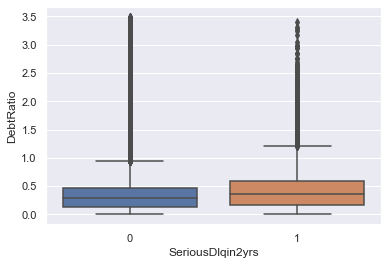

In [22]:
sns.boxplot(x="SeriousDlqin2yrs", y="DebtRatio", data=df[(df.MonthlyIncome > 1) & (df.DebtRatio < 3.5)])

Positive cases generally have a higher DebtRatio.

### RevolvingUtilizationOfUnsecuredLines VS Target

In [23]:
df.RevolvingUtilizationOfUnsecuredLines.quantile(0.995)

1.366269304065009

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='RevolvingUtilizationOfUnsecuredLines'>

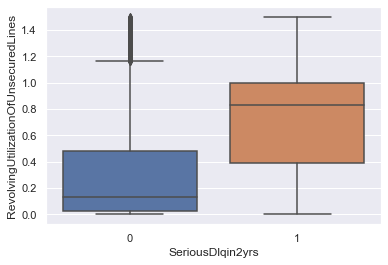

In [24]:
sns.boxplot(x="SeriousDlqin2yrs", y="RevolvingUtilizationOfUnsecuredLines", 
            data=df[df.RevolvingUtilizationOfUnsecuredLines < 1.5])

For majority of the cases, positive cases usually have higher RevolvingUtilizationOfUnsecuredLines ratios.

### MonthlyIncome VS Target

Text(0.5, 1.0, 'log(MonthlyIncome) VS Target')

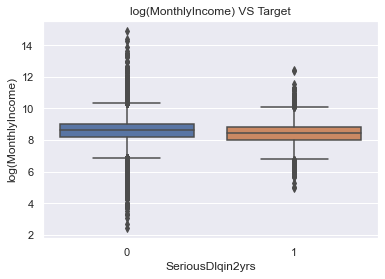

In [26]:
plot_df = df[df.MonthlyIncome > 10]
sns.boxplot(x=plot_df["SeriousDlqin2yrs"], y=np.log(plot_df["MonthlyIncome"]))
plt.ylabel("log(MonthlyIncome)")
plt.title("log(MonthlyIncome) VS Target")

While genereally positive cases are lowere-middle income, many non-positive cases are either very high or very low income. One reason could be the age - where younger people with lower incomes do not have many loans to pay off. Hence, in feature engineering, we should consider creating income features that are related to age groups 

# [2] Data Pre-processing (Initial)

In [27]:
# Remove age < 21
df = df[df.age > 21]

In [28]:
# Fill NA
df.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29678
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3893
dtype: int64

In [31]:
# If NumberOfDependetns is NA, assume to be 0.
# If MonthlyIncome is NA, data is most probably missing. Fill as 0 first.
df = df.fillna(0)

### Fix DebtRatio for missing monthlyincome 
- (temporary fix to run baseline model - more elaborate imputation in further feature engineering)

In [32]:
# Reverse-calculate Debt
df['missing'] = (df['MonthlyIncome'] < 10).astype(int)
df['MonthlyIncome'] = df['MonthlyIncome'].replace(0, 1)
df['Debt'] = df['DebtRatio'] * df['MonthlyIncome']

# For MonthlyIncome that are missing, fill with population median
df['MonthlyIncome'] = df['MonthlyIncome'].replace(1, df['MonthlyIncome'].median())

# Re-calculate DebtRatio = Debt/MonthlyIncome
df['DebtRatio'] = df['Debt']/df['MonthlyIncome']

# [3] Train-val split

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
y = df.SeriousDlqin2yrs
X = df.drop(columns=["SeriousDlqin2yrs"])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# [4] Baseline model

Random Forest: tree-based ensemble
- explainable
- both categorical and continuous variables
- 'feature selection'
- balance class

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [37]:
clf = RandomForestClassifier(max_depth=3, random_state=0, class_weight='balanced')
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc')

In [38]:
print("AUC: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

AUC: 0.853 (+/- 0.009)


In [39]:
clf.fit(X_train, y_train)
pred_proba = clf.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, pred_proba[:, 1])
print(roc_auc)

0.854086740677754


Our initial model has an average AUC of 0.853 on the Training cross-validated set, and an AUC of 0.854 on the Test set.

In [41]:
def show_feat_importance(clf, X):
    feat_imp = pd.DataFrame()
    feat_imp['cols'] = X.columns
    feat_imp['impt'] = clf.feature_importances_
    return feat_imp.sort_values('impt', ascending=False)

In [42]:
show_feat_importance(clf, X)

,cols,impt
0,RevolvingUtilizationOfUnsecuredLines,0.405473
6,NumberOfTimes90DaysLate,0.198409
2,NumberOfTime30-59DaysPastDueNotWorse,0.180328
8,NumberOfTime60-89DaysPastDueNotWorse,0.132301
1,age,0.039592
3,DebtRatio,0.011723
5,NumberOfOpenCreditLinesAndLoans,0.011507
4,MonthlyIncome,0.010040
7,NumberRealEstateLoansOrLines,0.005182
9,NumberOfDependents,0.003164


The top features in the model are: 
    
1. RevolvingUtilizationOfUnsecuredLines
2-4. Number of times late for N days
5. Age
6. DebtRatio

While features such as Debt, NumberOfDependents, and NumberRealEstateLoansOrLines are less important.

# [5] Feature Engineering

* AgeBin: Age split into bins of 10 years
* MonthlyIncome: imputation of monthly income based on median income of age bin
* DebtRatio: re-calculate Debt Ratio based on imputated monthly income
* NumberofTimesLate: sum of (NumberOfTime30-59DaysPastDueNotWorse, NumberOfTime60-89DaysPastDueNotWorse, NumberOfTime90DaysLate)
* NumberofLoans: sum of (NumberOfOpenCreditLinesAndLoans, NumberRealEstateLoansOrLines)
* hasMultipleRealEstates: If the Number of Real Estates is greater than 2
* MonthlyIncomePerPerson: Monthly Income divided by (number of dependents + 1(self))
* Under70: If person is under 70 (those above 70 are less likely to be defaulted)
* FrequentNumberOfTime60-89DaysPastDueNotWorse: If NumberOfTime60-89DaysPastDueNotWorse > 2 (those less than 2 are less likely to be defaulted)
* FrequentNumberOfTime30-59DaysPastDueNotWorse: If NumberOfTime30-59DaysPastDueNotWorse > 3 (those less than 3 are less likely to be defaulted)
* FrequentNumberOfTimes90DaysLate: If FrequentNumberOfTimes90DaysLate > 1 (those less than 1 are less likely to be defaulted)
* IncomePercentile: Percentile of MonthlyIncome among the AgeBin.

In [43]:
def add_features(df, median_income_dict):
    df['AgeBin'] = pd.cut(df['age'], [i for i in range(0, 120, 10)], labels=[i for i in range(1, 12, 1)])
    df['MonthlyIncome'] = np.where(df.missing == 1, df.apply(lambda x: median_income_dict[x.AgeBin], axis=1), 
                                   df['MonthlyIncome'])
    df['DebtRatio'] = df['Debt']/df['MonthlyIncome']
    df['NumberofTimesLate'] = df['NumberOfTime30-59DaysPastDueNotWorse'] + df['NumberOfTime60-89DaysPastDueNotWorse'] + df['NumberOfTimes90DaysLate']
    df['NumberofLoans'] = df['NumberOfOpenCreditLinesAndLoans'] + df['NumberRealEstateLoansOrLines']
    df['hasMultipleRealEstates'] = (df.NumberRealEstateLoansOrLines > 2).astype(int)
    df['MonthlyIncomePerPerson'] = df['MonthlyIncome']/(df['NumberOfDependents'] + 1)
    df['Under70'] = (df.age < 70).astype(int)
    df['FrequentNumberOfTime60-89DaysPastDueNotWorse'] = (df['NumberOfTime60-89DaysPastDueNotWorse'] > 2).astype(int)
    df['FrequentNumberOfTime30-59DaysPastDueNotWorse'] = (df['NumberOfTime30-59DaysPastDueNotWorse'] > 3).astype(int)
    df['FrequentNumberOfTimes90DaysLate'] = (df['NumberOfTimes90DaysLate'] > 1).astype(int)
    return df

In [44]:
X_train['AgeBin'] = pd.cut(X_train['age'], [i for i in range(0, 120, 10)], labels=[i for i in range(1, 12, 1)])
# Calculate median income in age-group based on training data ONLY (to avoid data leak)
median_income_dict = X_train[X_train.missing == 0].groupby(['AgeBin']).MonthlyIncome.median().to_dict()

/Users/wenqing/Documents/GiveMeSomeCredit/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
X_train = add_features(X_train, median_income_dict)
X_test = add_features(X_test, median_income_dict)

/Users/wenqing/Documents/GiveMeSomeCredit/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/wenqing/Documents/GiveMeSomeCredit/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/wenqing/Documents/GiveMeSomeCredit/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [48]:
# Calculate monthly income percentile based on training data ONLY (to avoid data leak)
X_train['IncomePercentile'] = X_train.groupby('age').MonthlyIncome.rank(pct=True)
X_test['IncomePercentile'] = X_test['MonthlyIncome'].apply(lambda x: stats.percentileofscore(X_train.MonthlyIncome, x))

/Users/wenqing/Documents/GiveMeSomeCredit/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/wenqing/Documents/GiveMeSomeCredit/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# [6] Model evaluation

In [49]:
clf = RandomForestClassifier(max_depth=3, random_state=0, class_weight='balanced')
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc')

In [50]:
print("AUC: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

AUC: 0.852 (+/- 0.008)


In [51]:
clf.fit(X_train, y_train)
pred_proba = clf.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, pred_proba[:, 1])
print(roc_auc)

0.8524937066832081


After feature engineering, the model has an average AUC of 0.852 on the Training data, and an AUC of 0.852 on the Test data. Although this is slightly lower than the initial baseline (0.854 on Test), let us tune the model parameters to see if it can be improved.

In [52]:
from sklearn.metrics import plot_roc_curve

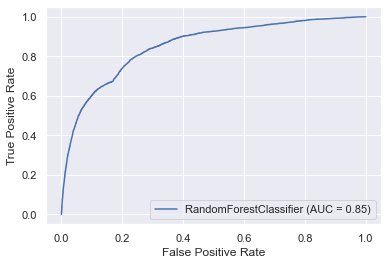

In [53]:
plot_roc_curve(clf, X_test, y_test)

In [54]:
show_feat_importance(clf, X_train)

,cols,impt
13,NumberofTimesLate,2.658237e-01
0,RevolvingUtilizationOfUnsecuredLines,2.144733e-01
2,NumberOfTime30-59DaysPastDueNotWorse,1.447385e-01
6,NumberOfTimes90DaysLate,1.391532e-01
20,FrequentNumberOfTimes90DaysLate,7.548618e-02
8,NumberOfTime60-89DaysPastDueNotWorse,6.898742e-02
1,age,3.281383e-02
12,AgeBin,1.893030e-02
14,NumberofLoans,6.245057e-03
16,MonthlyIncomePerPerson,5.703407e-03


The number of times late make up 5 of the top 6 features.
Other important features include: RevolvingUtilizationOfUnsecuredLines, Age-related features, and NumberofLoans.

Real Estate-related features are the most unimportant, with NumberOfDependents and Debt.

This is relatively in line with the initial model.

# [7] Model Parameter Tuning

Tune model parameters using Bayesian Optimization.

In [62]:
from tune_sklearn import TuneSearchCV

In [ ]:
space = {'max_depth': (3, 5, 7, 9),
         'min_samples_split': (2, 5, 10, 15, 100),
         'min_samples_leaf': (1, 2, 5, 10) 
        }

tune_search = TuneSearchCV(
    clf,
    space,
    search_optimization="bayesian",
    n_trials=10,
    early_stopping=True,
    max_iters=300,
    scoring = "roc_auc"
)
tune_search.fit(X_train, y_train)
print(tune_search.best_params_)

In [77]:
tune_search.cv_results_

{'params': [{'max_depth': 9,
   'min_samples_leaf': 5,
   'min_samples_split': 10,
   'n_estimators': 100},
  {'max_depth': 3,
   'min_samples_leaf': 5,
   'min_samples_split': 10,
   'n_estimators': 100},
  {'max_depth': 3,
   'min_samples_leaf': 5,
   'min_samples_split': 15,
   'n_estimators': 100},
  {'max_depth': 5,
   'min_samples_leaf': 2,
   'min_samples_split': 15,
   'n_estimators': 200},
  {'max_depth': 9,
   'min_samples_leaf': 2,
   'min_samples_split': 10,
   'n_estimators': 200},
  {'max_depth': 5,
   'min_samples_leaf': 1,
   'min_samples_split': 15,
   'n_estimators': 300},
  {'max_depth': 5,
   'min_samples_leaf': 2,
   'min_samples_split': 15,
   'n_estimators': 200},
  {'max_depth': 5,
   'min_samples_leaf': 2,
   'min_samples_split': 15,
   'n_estimators': 200},
  {'max_depth': 7,
   'min_samples_leaf': 5,
   'min_samples_split': 5,
   'n_estimators': 100},
  {'max_depth': 5,
   'min_samples_leaf': 1,
   'min_samples_split': 15,
   'n_estimators': 200}],
 'split0_t

# [8] Error Analysis
- What are the model's limitations?
- How can it be improved?

In [55]:
best_params = {'max_depth': 7,
   'min_samples_leaf': 5,
   'min_samples_split': 5,
   'n_estimators': 100}

In [56]:
clf = RandomForestClassifier(random_state=0, class_weight='balanced', **best_params)
clf.fit(X_train, y_train)
pred_proba = clf.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, pred_proba[:, 1])
print(roc_auc)

0.861767438056565


The tuned model has an ROC of 0.862 on the Test dataset.

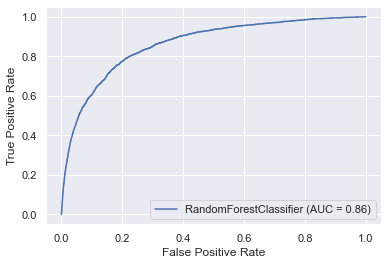

In [57]:
plot_roc_curve(clf, X_test, y_test)

In [58]:
show_feat_importance(clf, X_test)

,cols,impt
13,NumberofTimesLate,0.268542
0,RevolvingUtilizationOfUnsecuredLines,0.249288
2,NumberOfTime30-59DaysPastDueNotWorse,0.121810
6,NumberOfTimes90DaysLate,0.107151
8,NumberOfTime60-89DaysPastDueNotWorse,0.065513
20,FrequentNumberOfTimes90DaysLate,0.047834
1,age,0.031694
12,AgeBin,0.016627
3,DebtRatio,0.016163
14,NumberofLoans,0.011482


Similar to the un-tuned model, 5/6 of the top features are related to late payments, together with RevolvingUtilizationOfUnsecuredLines and Age-related features.

Again, real estate-related features are unimportant, as is NumberOfDependents. Making more than 2 late payments between 60-89 days was also unimportant.

From the feature importances, we can tell that:
-  Whether a person experienced 90 days past due delinquency or worse is highly related to their historical record of late payments and their age-group, which could be indicators of their tendency and ability to pay.
- It is also highly related to their RevolvingUtilizationOfUnsecuredLines (Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits.), which might be an indicator of their debt situation and spending habits.
- The NumberOfDependents and real estates are not strong features, possibly because there is a circular-relationship between the 2 features and the target feature (e.g. the more income you have to spend, the more real estates you will purchase. The more real estates you purchase, the more loans you have.).

In [59]:
test_df = X_test.copy()
test_df['pred'] = pred_proba[:, 1]
test_df['actual'] = y_test

In [60]:
test_df['error'] = test_df['actual'] - test_df['pred']

### Age VS Error

/Users/wenqing/Documents/GiveMeSomeCredit/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'AgeBin VS Absolute Error')

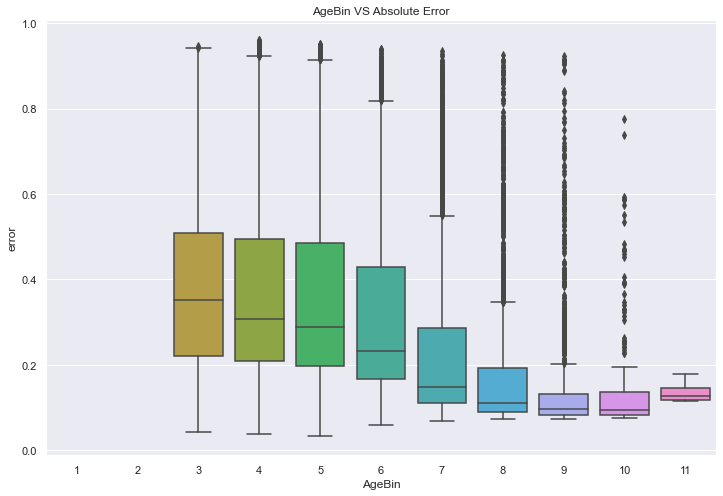

In [63]:
plt.figure(figsize=(12, 8))
sns.boxplot(test_df['AgeBin'], abs(test_df['error']))
plt.title("AgeBin VS Absolute Error")

Lower age-bins (3-6: 20-40 year-olds) had higher errors.

### NumberofTimesLate VS Error

/Users/wenqing/Documents/GiveMeSomeCredit/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'NumberofTimesLate VS Absolute Error')

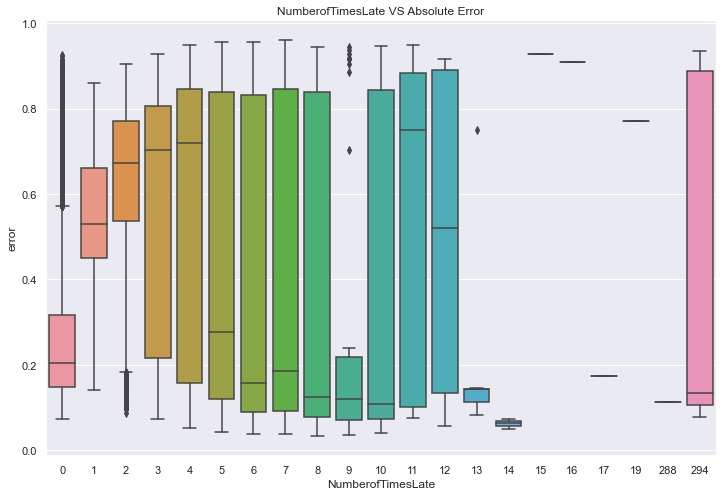

In [62]:
plt.figure(figsize=(12, 8))
sns.boxplot(test_df['NumberofTimesLate'], abs(test_df['error']))
plt.title("NumberofTimesLate VS Absolute Error")

Lower numbers of times (1-4 times) late had higher errors, and so did 11 and 12 times late (although these only had 17 and 4 cases respectively and cannot be generalized).

### NumberofLoans VS Error

/Users/wenqing/Documents/GiveMeSomeCredit/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'NumberofLoans VS Absolute Error')

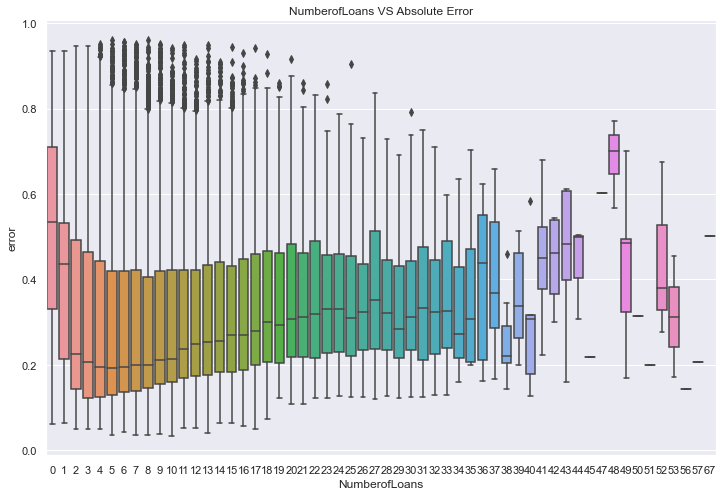

In [64]:
plt.figure(figsize=(12, 8))
sns.boxplot(test_df['NumberofLoans'], abs(test_df['error']))
plt.title("NumberofLoans VS Absolute Error")

Interestingly, having a low number of loans (0 to 1) had higher errors. Also, having a very high number of loans (35 and above) had higher errors.

### DebtRatio VS Error

/Users/wenqing/Documents/GiveMeSomeCredit/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'DebtRatio VS Absolute Error (regression)')

<Figure size 1080x720 with 0 Axes>

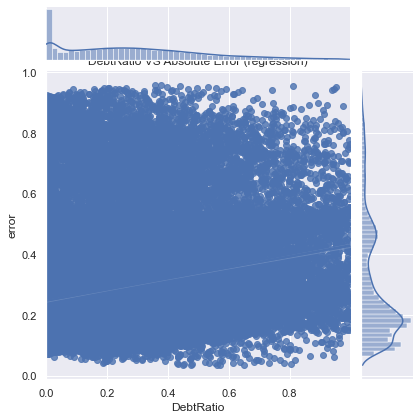

In [66]:
plt.figure(figsize=(15, 10))
plot_df = test_df[test_df.DebtRatio < 1]
sns.jointplot(plot_df['DebtRatio'], abs(plot_df['error']), kind="reg")
plt.title("DebtRatio VS Absolute Error (regression)")

/Users/wenqing/Documents/GiveMeSomeCredit/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'DebtRatio VS Absolute Error (categorical)')

<Figure size 1080x720 with 0 Axes>

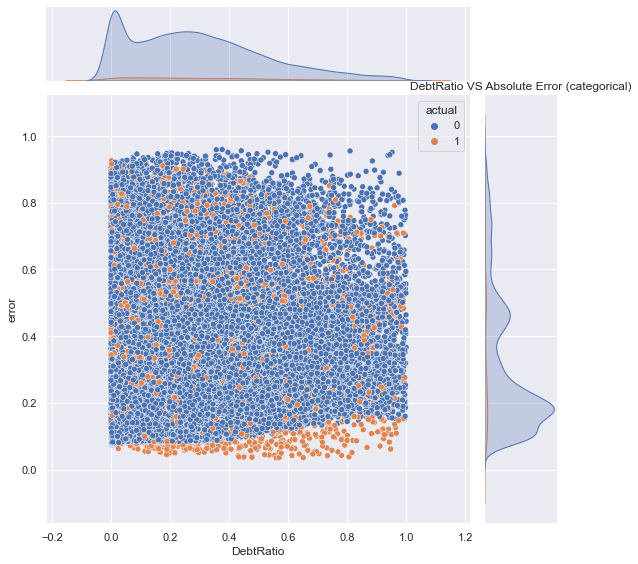

In [67]:
plt.figure(figsize=(15, 10))
plot_df = test_df[test_df.DebtRatio < 1]
sns.jointplot(plot_df['DebtRatio'], abs(plot_df['error']), hue=plot_df["actual"], height=8)
plt.title("DebtRatio VS Absolute Error (categorical)")

Generally, a higher DebtRatio has higher errors. However, in the positive clas, there are several cases with low DebtRatio but high error. 

### IncomePercentile VS Error

/Users/wenqing/Documents/GiveMeSomeCredit/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'IncomePercentile VS Absolute Error (Categorical)')

<Figure size 1080x720 with 0 Axes>

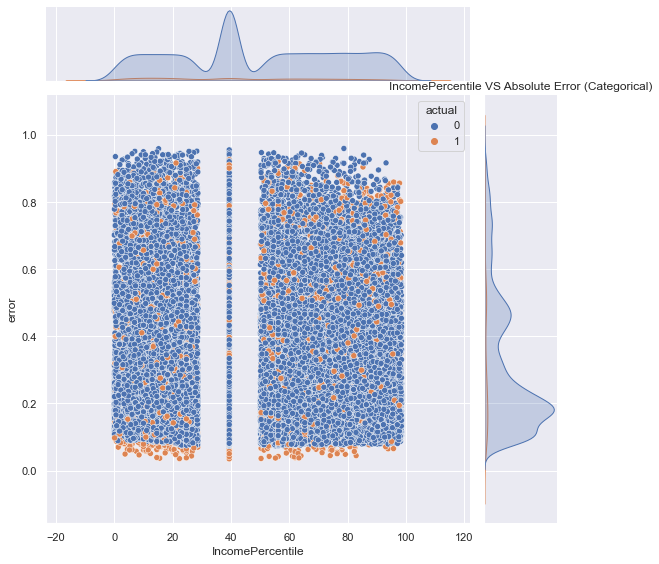

In [68]:
plt.figure(figsize=(15, 10))
plot_df = test_df[test_df.MonthlyIncome < 20000]
sns.jointplot(plot_df['IncomePercentile'], abs(plot_df['error']), hue=plot_df["actual"], height=8)
plt.title("IncomePercentile VS Absolute Error (Categorical)")

/Users/wenqing/Documents/GiveMeSomeCredit/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'IncomePercentile VS Absolute Error (Regression)')

<Figure size 1080x720 with 0 Axes>

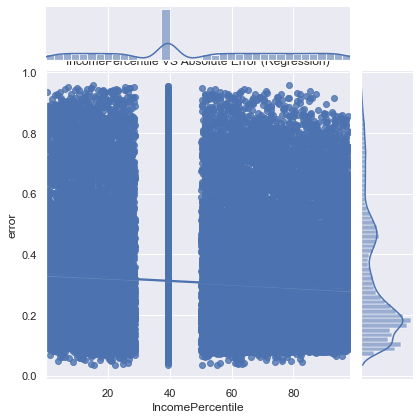

In [69]:
plt.figure(figsize=(15, 10))
plot_df = test_df[test_df.MonthlyIncome < 20000]
sns.jointplot(plot_df['IncomePercentile'], abs(plot_df['error']), kind="reg")
plt.title("IncomePercentile VS Absolute Error (Regression)")

# [9] Further Model Improvements
- Other than the above mentioned additional features to capture, more can be done to improve the existing model:
    - Tune parameters further
    - Try out other model types (XGB, LGBM, etc.)
    - Remove feature outliers
    - Some ideas for additional features:
        - Target-encoded categorical features
        - Binned continuous features

# [10] Predict on Kaggle Test dataset :)

In [154]:
kaggle_test_df = pd.read_csv('data/cs-test.csv', index_col=0)

In [ ]:
def feature_eng(train_df, test_df):
    train_df['AgeBin'] = pd.cut(train_df['age'], [i for i in range(0, 120, 10)], labels=[i for i in range(1, 12, 1)])
    # Calculate median income in age-group based on training data ONLY (to avoid data leak)
    median_income_dict = train_df[train_df.missing == 0].groupby(['AgeBin']).MonthlyIncome.median().to_dict()
    
    # Fill missing data
    test_df = test_df.fillna(0)
    test_df['missing'] = (test_df['MonthlyIncome'] < 10).astype(int)
    test_df['MonthlyIncome'] = test_df['MonthlyIncome'].replace(0, 1)
    test_df['Debt'] = test_df['DebtRatio'] * test_df['MonthlyIncome']
    
    # Add features
    train_df = add_features(train_df, median_income_dict)
    test_df = add_features(test_df, median_income_dict)
    
    # Calculate monthly income percentile based on training data ONLY (to avoid data leak)
    train_df['IncomePercentile'] = train_df.groupby('age').MonthlyIncome.rank(pct=True)
    # Calculate monthly income percentile based on entire data in for Test
    test_df['IncomePercentile'] = test_df['MonthlyIncome'].apply(lambda x: stats.percentileofscore(train_df.MonthlyIncome, x))

    return train_df, test_df

In [ ]:
df, kaggle_test_df = feature_eng(df, kaggle_test_df)

In [163]:
y_train = train_df.SeriousDlqin2yrs
X_train = train_df.drop(columns=["SeriousDlqin2yrs"])

In [166]:
clf = RandomForestClassifier(random_state=0, class_weight='balanced', **best_params)
clf.fit(X_train, y_train)
pred_proba = clf.predict_proba(kaggle_test_df.drop(columns=["SeriousDlqin2yrs"]))

In [170]:
pd.DataFrame(clf.predict(kaggle_test_df.drop(columns=["SeriousDlqin2yrs"]))).value_counts(normalize=True)

0    0.825503
1    0.174497
dtype: float64

In [177]:
submission_df = pd.read_csv('data/sampleEntry.csv')

In [178]:
submission_df['Probability'] = pred_proba[:, 1]

In [181]:
submission_df.to_csv('data/submission.csv', index=False)

In [ ]:
# Kaggle Evaluation Result: 0.85520